In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/oct'
dme_path = os.path.join(dataset_path, 'OCT_DME')
dr_path = os.path.join(dataset_path, 'OCT_DR')
healthy_path = os.path.join(dataset_path, 'OCT_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the multi-scale attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size), epochs=epochs)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


FileNotFoundError: ignored

Epoch 1/10
28/28 [==============================] - 16s 470ms/step - loss: 3.8870 - accuracy: 0.5337 - val_loss: 0.7314 - val_accuracy: 0.7758
Epoch 2/10
28/28 [==============================] - 13s 462ms/step - loss: 0.7355 - accuracy: 0.7596 - val_loss: 0.6360 - val_accuracy: 0.7803
Epoch 3/10
28/28 [==============================] - 13s 481ms/step - loss: 0.6566 - accuracy: 0.7730 - val_loss: 0.6052 - val_accuracy: 0.8027
Epoch 4/10
28/28 [==============================] - 13s 476ms/step - loss: 0.5944 - accuracy: 0.7910 - val_loss: 0.6950 - val_accuracy: 0.7803
Epoch 5/10
28/28 [==============================] - 13s 469ms/step - loss: 0.5575 - accuracy: 0.8236 - val_loss: 0.5552 - val_accuracy: 0.8430
Epoch 6/10
28/28 [==============================] - 13s 466ms/step - loss: 0.5542 - accuracy: 0.8146 - val_loss: 0.6940 - val_accuracy: 0.7668
Epoch 7/10
28/28 [==============================] - 13s 479ms/step - loss: 0.4648 - accuracy: 0.8393 - val_loss: 0.4997 - val_accuracy: 0.8027

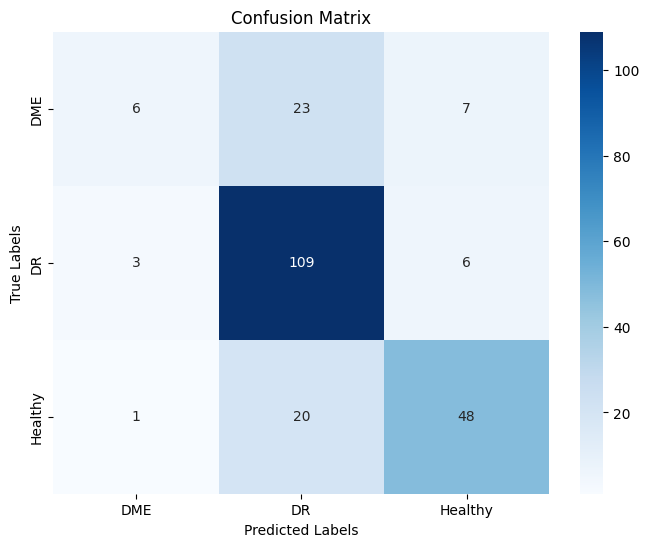

              precision    recall  f1-score   support

         DME       0.60      0.17      0.26        36
          DR       0.72      0.92      0.81       118
     Healthy       0.79      0.70      0.74        69

    accuracy                           0.73       223
   macro avg       0.70      0.60      0.60       223
weighted avg       0.72      0.73      0.70       223



In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/oct'
dme_path = os.path.join(dataset_path, 'OCT_DME')
dr_path = os.path.join(dataset_path, 'OCT_DR')
healthy_path = os.path.join(dataset_path, 'OCT_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the region guided attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
attention = Conv2D(1, (1, 1), activation='sigmoid')(x)
attention = Multiply()([x, attention])
x = Add()([x, attention])

# Create the model
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


Epoch 1/20
28/28 [==============================] - 19s 521ms/step - loss: 1.6097 - accuracy: 0.5393 - val_loss: 0.7856 - val_accuracy: 0.7758
Epoch 2/20
28/28 [==============================] - 13s 474ms/step - loss: 0.7338 - accuracy: 0.7753 - val_loss: 0.8805 - val_accuracy: 0.6143
Epoch 3/20
28/28 [==============================] - 13s 469ms/step - loss: 0.6725 - accuracy: 0.7663 - val_loss: 0.6415 - val_accuracy: 0.7534
Epoch 4/20
28/28 [==============================] - 13s 446ms/step - loss: 0.5948 - accuracy: 0.7854 - val_loss: 0.5228 - val_accuracy: 0.8386
Epoch 5/20
28/28 [==============================] - 13s 471ms/step - loss: 0.5209 - accuracy: 0.8292 - val_loss: 0.5153 - val_accuracy: 0.8251
Epoch 6/20
28/28 [==============================] - 15s 530ms/step - loss: 0.5163 - accuracy: 0.8281 - val_loss: 0.5269 - val_accuracy: 0.7803
Epoch 7/20
28/28 [==============================] - 13s 481ms/step - loss: 0.4592 - accuracy: 0.8348 - val_loss: 0.5648 - val_accuracy: 0.7668

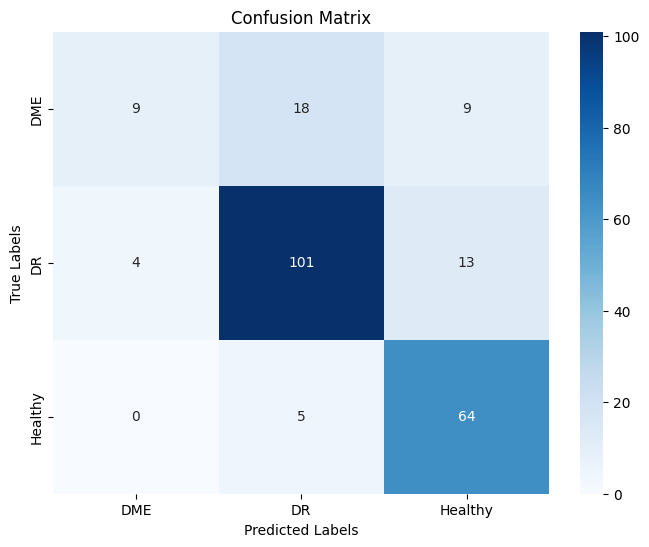

              precision    recall  f1-score   support

         DME       0.69      0.25      0.37        36
          DR       0.81      0.86      0.83       118
     Healthy       0.74      0.93      0.83        69

    accuracy                           0.78       223
   macro avg       0.75      0.68      0.68       223
weighted avg       0.77      0.78      0.76       223



In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/oct'
dme_path = os.path.join(dataset_path, 'OCT_DME')
dr_path = os.path.join(dataset_path, 'OCT_DR')
healthy_path = os.path.join(dataset_path, 'OCT_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the region guided attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

attention = GlobalAveragePooling2D()(x)
attention = Dense(256, activation='relu')(attention)
attention = Dense(1, activation='sigmoid')(attention)
attention = Multiply()([x, attention])

x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)


Epoch 1/20
28/28 [==============================] - 34s 609ms/step - loss: 1.3766 - accuracy: 0.5281 - val_loss: 1.0142 - val_accuracy: 0.5291
Epoch 2/20
28/28 [==============================] - 14s 506ms/step - loss: 0.9279 - accuracy: 0.6236 - val_loss: 3.1546 - val_accuracy: 0.7803
Epoch 3/20
28/28 [==============================] - 14s 497ms/step - loss: 0.9446 - accuracy: 0.6045 - val_loss: 0.7830 - val_accuracy: 0.7309
Epoch 4/20
28/28 [==============================] - 25s 925ms/step - loss: 0.8572 - accuracy: 0.6955 - val_loss: 0.8057 - val_accuracy: 0.7265
Epoch 5/20
28/28 [==============================] - 15s 521ms/step - loss: 0.7336 - accuracy: 0.7562 - val_loss: 0.7496 - val_accuracy: 0.7399
Epoch 6/20
28/28 [==============================] - 14s 500ms/step - loss: 0.7063 - accuracy: 0.7708 - val_loss: 0.7069 - val_accuracy: 0.7623
Epoch 7/20
28/28 [==============================] - 14s 485ms/step - loss: 0.7271 - accuracy: 0.7607 - val_loss: 0.6810 - val_accuracy: 0.7623

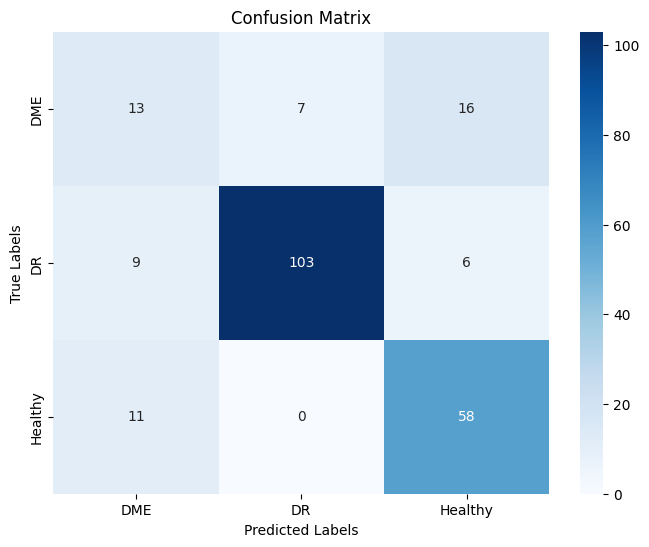

              precision    recall  f1-score   support

         DME       0.39      0.36      0.38        36
          DR       0.94      0.87      0.90       118
     Healthy       0.72      0.84      0.78        69

    accuracy                           0.78       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.78      0.78      0.78       223



In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Multiply, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the paths to your dataset
dataset_path = '/content/drive/MyDrive/OCT-AND-EYE-FUNDUS-DATASET-main/oct'
dme_path = os.path.join(dataset_path, 'OCT_DME')
dr_path = os.path.join(dataset_path, 'OCT_DR')
healthy_path = os.path.join(dataset_path, 'OCT_HEALTHY')

# Set the image dimensions
image_width, image_height = 256, 256

# Load the images and labels
images = []
labels = []

for class_path, class_label in [(dme_path, 0), (dr_path, 1), (healthy_path, 2)]:
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (image_width, image_height))
        images.append(image)
        labels.append(class_label)

# Convert the data to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(train_images)

# Convert labels to one-hot encoded vectors
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the region guided attention network
input_tensor = Input(shape=(image_width, image_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

attention = GlobalAveragePooling2D()(x)
attention = Dense(256, activation='relu')(attention)
attention = Dense(1, activation='sigmoid')(attention)
attention = Multiply()([x, attention])

x = GlobalAveragePooling2D()(attention)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['DME', 'DR', 'Healthy']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, F1-score, and support
report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)
